# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 10 Task 1 - Supervised Classification
### Assignment by: Kat Weissman

#### General objective:

- Practice and become familiar with classification algorithms.

#### Python Learning Objectives:
- Classification trees
- KNN - k-Nearest Neighbors
- Logistic Regression
- Support Vector Machine
- XGboost

*Recommended learning resources:*
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587
- https://www.ritchieng.com/machine-learning-evaluate-classification-model/
- https://towardsdatascience.com/hackcvilleds-4636c6c1ba53
- https://scikit-learn.org/stable/modules/cross_validation.html

Classification Models:
- https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
- https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
- https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- https://www.datacamp.com/community/tutorials/xgboost-in-python

Imbalanced Data:
- https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
- https://www.kdnuggets.com/2019/05/fix-unbalanced-dataset.html
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [1]:
#Import libraries - basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Import libraries - classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

### Level 1
### Exercise 1 
Create at least three different classification models to try to best predict DelayedFlights.csv flight delay (ArrDelay). Consider whether the flight is late or not (ArrDelay> 0).

Reference: https://towardsdatascience.com/lazy-predict-fit-and-evaluate-all-the-models-from-scikit-learn-with-a-single-line-of-code-7fe510c7281

In [3]:
pd.set_option('display.max_columns', None)  #set display to show all columns

In [4]:
data_link = '/Users/kat/Library/Mobile Documents/com~apple~CloudDocs/IT Academy/Data Science Itinerary/Data/DelayedFlights.csv'
df = pd.read_csv(data_link)

#### Data Exploration & Pre-processing

In [5]:
# Show number of rows and columns in dataframe
df.shape

(1936758, 30)

In [6]:
# Show column names
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
# Display first 5 rows of dataframe
df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [8]:
# check data set variables
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [9]:
# Check for duplicates
sum(df.duplicated())

0

Plotting a diagonal correlation matrix: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<AxesSubplot:>

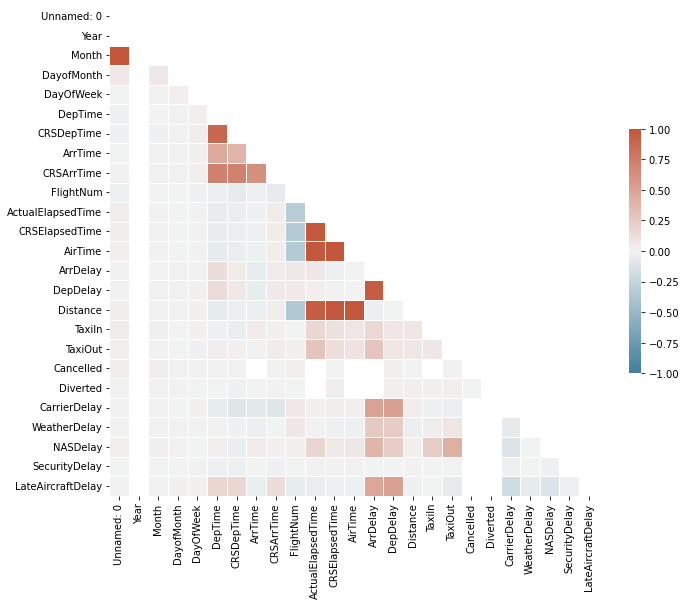

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin= -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

DepDelay is the variable most correlated with ArrDelay. DepTime, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, and LateAircraftDelay also have some positive correlations with ArrDelay. DepDelay could be the sum of CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay for any given flight, which is the case for Observation 3 in the data preview. I will repeat the evaluation and feature engineering which I did for the Regression models.

Reference for categorized delays:
https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations

#### Feature Engineering

In [11]:
# Create new variable which is the sum of categorized delays
df["SumDelay"] = df.CarrierDelay + df.WeatherDelay + df.NASDelay + df.SecurityDelay + df.LateAircraftDelay
# Display the summary statistics of "SumDelay" and "DepDelay" variables
print(round(df.SumDelay.describe()),2)
print(round(df.DepDelay.describe()),2)

count    1247488.0
mean          63.0
std           61.0
min           15.0
25%           26.0
50%           43.0
75%           79.0
max         2461.0
Name: SumDelay, dtype: float64 2
count    1936758.0
mean          43.0
std           53.0
min            6.0
25%           12.0
50%           24.0
75%           53.0
max         2467.0
Name: DepDelay, dtype: float64 2


In [12]:
# Create new variable which is the difference of SumDelay and DepDelay and display summary stats
df['Diff_SumDelay_DepDelay'] = df.SumDelay - df.DepDelay
print(round(df.Diff_SumDelay_DepDelay.describe()),2)

count    1247488.0
mean           4.0
std           19.0
min         -181.0
25%           -7.0
50%            0.0
75%           10.0
max          759.0
Name: Diff_SumDelay_DepDelay, dtype: float64 2


DepDelay is not always equal to the sum of the categorized delays, however the value is very close. The median difference is 0, and a great majority of observations have an absolute difference of 10 minutes or less between SumDelay and DepDelay, with an average difference of 4 minutes.

<AxesSubplot:xlabel='Diff_SumDelay_DepDelay', ylabel='Count'>

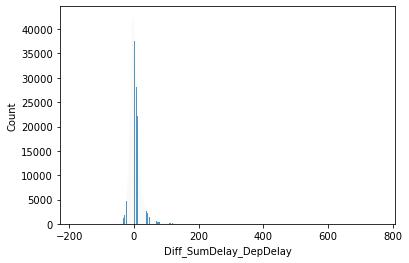

In [13]:
# Show histogram of variable representing difference of SumDelay and DepDelay
sns.histplot(data=df, x='Diff_SumDelay_DepDelay')

In [14]:
# Check for NA values
df.isna().sum()

Unnamed: 0                     0
Year                           0
Month                          0
DayofMonth                     0
DayOfWeek                      0
DepTime                        0
CRSDepTime                     0
ArrTime                     7110
CRSArrTime                     0
UniqueCarrier                  0
FlightNum                      0
TailNum                        5
ActualElapsedTime           8387
CRSElapsedTime               198
AirTime                     8387
ArrDelay                    8387
DepDelay                       0
Origin                         0
Dest                           0
Distance                       0
TaxiIn                      7110
TaxiOut                      455
Cancelled                      0
CancellationCode               0
Diverted                       0
CarrierDelay              689270
WeatherDelay              689270
NASDelay                  689270
SecurityDelay             689270
LateAircraftDelay         689270
SumDelay  

Since ArrDelay is the target variable, and we are interested in training a model which can predict whether or not there is a delay, I am going to remove the observations where ArrDelay is NA.

In [15]:
# drop rows where ArrDelay is NA
df = df.dropna(subset=['ArrDelay'])

In [16]:
# Check for NA values
df.isna().sum()

Unnamed: 0                     0
Year                           0
Month                          0
DayofMonth                     0
DayOfWeek                      0
DepTime                        0
CRSDepTime                     0
ArrTime                        0
CRSArrTime                     0
UniqueCarrier                  0
FlightNum                      0
TailNum                        3
ActualElapsedTime              0
CRSElapsedTime                 0
AirTime                        0
ArrDelay                       0
DepDelay                       0
Origin                         0
Dest                           0
Distance                       0
TaxiIn                         0
TaxiOut                        0
Cancelled                      0
CancellationCode               0
Diverted                       0
CarrierDelay              680883
WeatherDelay              680883
NASDelay                  680883
SecurityDelay             680883
LateAircraftDelay         680883
SumDelay  

"For a feature to be treated as categorical, it must be expressed as object type in the underlying DataFrame." - https://towardsdatascience.com/lazy-predict-fit-and-evaluate-all-the-models-from-scikit-learn-with-a-single-line-of-code-7fe510c7281

In [17]:
# One-hot encode the ArrDelay
df['Delayed'] = (df['ArrDelay'] > 0).astype(int)

# Adjust data types for classification tasks
df = df.astype({"Year": object,
                "Month": object,
                "DayofMonth": object,
                "DayOfWeek": object,
                "FlightNum": object,
                "Cancelled": object,
                "Diverted": object,
                "Delayed": object,})

In [18]:
# Check percentage split of values in each category of one-hot encoding
df.Delayed.value_counts(normalize = True)

1    0.893715
0    0.106285
Name: Delayed, dtype: float64

After removing the NA values for ArrDelay, the dataframe is large and almost has 2 million observations. For the purpose of learning how to implement the models in a timely manner, I will sample 5% of the dataframe. I have attempted creating models using the whole dataframe, but the amount of time needed is too long, and some algorithms seem to never end, especially SVM and XGBoost.

In [19]:
df.shape

(1928371, 33)

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

Default arguments:

DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

In [20]:
df_sample = df.sample(frac=.05, random_state=324)

In [21]:
df_sample.shape

(96419, 33)

In [22]:
df_sample.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,SumDelay,Diff_SumDelay_DepDelay,Delayed
1098428,3654724,2008,7,18,5,1511.0,1505,1740.0,1740,WN,1418,N452WN,269.0,275.0,252.0,0.0,6.0,BNA,OAK,1959,5.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
112686,361246,2008,1,11,5,1736.0,1730,1913.0,1858,FL,327,N955AT,97.0,88.0,69.0,15.0,6.0,BOS,BWI,370,9.0,19.0,0,N,0,6.0,0.0,9.0,0.0,0.0,15.0,9.0,1
599454,1878648,2008,4,29,2,1611.0,1600,1711.0,1700,WN,884,N241WN,60.0,60.0,41.0,11.0,11.0,ONT,LAS,197,3.0,16.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
743117,2434787,2008,5,16,5,1551.0,1535,1803.0,1740,WN,1564,N718SW,132.0,125.0,121.0,23.0,16.0,STL,HOU,687,3.0,8.0,0,N,0,0.0,0.0,7.0,0.0,16.0,23.0,7.0,1
581400,1812607,2008,4,9,3,1754.0,1725,1834.0,1820,WN,2284,N686SW,100.0,115.0,86.0,14.0,29.0,SLC,LAX,590,6.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


The target variable has a similar distribution between delayed and on-time arrivals in the 5% sample as the original dataset.

In [23]:
df_sample.Delayed.value_counts(normalize = True)

1    0.893226
0    0.106774
Name: Delayed, dtype: float64

The individual delay types such as Carrier, Weather, NAS, etc. have a high number of NAs compared to other variables, so we may not be able to use those variables as we did in the Regression models.

In [24]:
df_sample.isna().sum()

Unnamed: 0                    0
Year                          0
Month                         0
DayofMonth                    0
DayOfWeek                     0
DepTime                       0
CRSDepTime                    0
ArrTime                       0
CRSArrTime                    0
UniqueCarrier                 0
FlightNum                     0
TailNum                       0
ActualElapsedTime             0
CRSElapsedTime                0
AirTime                       0
ArrDelay                      0
DepDelay                      0
Origin                        0
Dest                          0
Distance                      0
TaxiIn                        0
TaxiOut                       0
Cancelled                     0
CancellationCode              0
Diverted                      0
CarrierDelay              33942
WeatherDelay              33942
NASDelay                  33942
SecurityDelay             33942
LateAircraftDelay         33942
SumDelay                  33942
Diff_Sum

#### Saving Data File for Models

I will save this data sample in a file that will be used to create the models in separate notebooks and confirm that is is written and can be read correctly.

In [25]:
df_sample.to_pickle('flights-processed-sampled.pkl.bz2',compression='bz2')

In [26]:
df_load =pd.read_pickle('flights-processed-sampled.pkl.bz2',compression='bz2')
df_load.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,SumDelay,Diff_SumDelay_DepDelay,Delayed
1098428,3654724,2008,7,18,5,1511.0,1505,1740.0,1740,WN,1418,N452WN,269.0,275.0,252.0,0.0,6.0,BNA,OAK,1959,5.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
112686,361246,2008,1,11,5,1736.0,1730,1913.0,1858,FL,327,N955AT,97.0,88.0,69.0,15.0,6.0,BOS,BWI,370,9.0,19.0,0,N,0,6.0,0.0,9.0,0.0,0.0,15.0,9.0,1
599454,1878648,2008,4,29,2,1611.0,1600,1711.0,1700,WN,884,N241WN,60.0,60.0,41.0,11.0,11.0,ONT,LAS,197,3.0,16.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
743117,2434787,2008,5,16,5,1551.0,1535,1803.0,1740,WN,1564,N718SW,132.0,125.0,121.0,23.0,16.0,STL,HOU,687,3.0,8.0,0,N,0,0.0,0.0,7.0,0.0,16.0,23.0,7.0,1
581400,1812607,2008,4,9,3,1754.0,1725,1834.0,1820,WN,2284,N686SW,100.0,115.0,86.0,14.0,29.0,SLC,LAX,590,6.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [27]:
df_load.shape

(96419, 33)

Because our target class is imbalanced, we need to use a sampling technique that will balance the classes for classification. I will use SMOTE, and create an X matrix that only includes relevant features I would like to use for training the model.

- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html


Default parameters for SMOTE:

class imblearn.over_sampling.SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)

Because we have categorical data, we must use the algorithm for SMOTENC:
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html

Default paramters for SMOTENC:

class imblearn.over_sampling.SMOTENC(categorical_features, *, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)

In [28]:
y = df_load.Delayed
y = y.astype('int')

In [29]:
# drop columns not relevant for training the model
X = df_load.drop(['Delayed','Unnamed: 0','Year','DayofMonth','FlightNum','TailNum',
                  'CancellationCode'], axis=1)

The SMOTE algorithm does not work when there are NA's present, so I will drop the features which have NA's present. In the real world, a different treatment of NA's is probably more appropriate, but for the sake of simplifying the assignment and learning the methods, I will drop them.

In [30]:
# drop columns with NAs
X.drop(['CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'
        ,'SumDelay','Diff_SumDelay_DepDelay'], axis=1, inplace=True)

In [31]:
X.head()

,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
1098428,7,5,1511.0,1505,1740.0,1740,WN,269.0,275.0,252.0,0.0,6.0,BNA,OAK,1959,5.0,12.0,0,0
112686,1,5,1736.0,1730,1913.0,1858,FL,97.0,88.0,69.0,15.0,6.0,BOS,BWI,370,9.0,19.0,0,0
599454,4,2,1611.0,1600,1711.0,1700,WN,60.0,60.0,41.0,11.0,11.0,ONT,LAS,197,3.0,16.0,0,0
743117,5,5,1551.0,1535,1803.0,1740,WN,132.0,125.0,121.0,23.0,16.0,STL,HOU,687,3.0,8.0,0,0
581400,4,3,1754.0,1725,1834.0,1820,WN,100.0,115.0,86.0,14.0,29.0,SLC,LAX,590,6.0,8.0,0,0


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96419 entries, 1098428 to 1545169
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              96419 non-null  object 
 1   DayOfWeek          96419 non-null  object 
 2   DepTime            96419 non-null  float64
 3   CRSDepTime         96419 non-null  int64  
 4   ArrTime            96419 non-null  float64
 5   CRSArrTime         96419 non-null  int64  
 6   UniqueCarrier      96419 non-null  object 
 7   ActualElapsedTime  96419 non-null  float64
 8   CRSElapsedTime     96419 non-null  float64
 9   AirTime            96419 non-null  float64
 10  ArrDelay           96419 non-null  float64
 11  DepDelay           96419 non-null  float64
 12  Origin             96419 non-null  object 
 13  Dest               96419 non-null  object 
 14  Distance           96419 non-null  int64  
 15  TaxiIn             96419 non-null  float64
 16  TaxiOut       

In [33]:
# transform the dataset
oversample = SMOTENC(categorical_features=[0,1,6,12,13,17,18], random_state=324)
X, y = oversample.fit_resample(X, y)

In [34]:
X.shape

(172248, 19)

In [35]:
y.shape

(172248,)

After using the SMOTE algorithm, our dataframe now has an equal amount of delayed and on-time flights.

In [36]:
y.value_counts(normalize = True)

1    0.5
0    0.5
Name: Delayed, dtype: float64

In [37]:
smoted = pd.concat([X,y], axis=1)

In [38]:
smoted.head()

,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Delayed
0,7,5,1511.0,1505,1740.0,1740,WN,269.0,275.0,252.0,0.0,6.0,BNA,OAK,1959,5.0,12.0,0,0,0
1,1,5,1736.0,1730,1913.0,1858,FL,97.0,88.0,69.0,15.0,6.0,BOS,BWI,370,9.0,19.0,0,0,1
2,4,2,1611.0,1600,1711.0,1700,WN,60.0,60.0,41.0,11.0,11.0,ONT,LAS,197,3.0,16.0,0,0,1
3,5,5,1551.0,1535,1803.0,1740,WN,132.0,125.0,121.0,23.0,16.0,STL,HOU,687,3.0,8.0,0,0,1
4,4,3,1754.0,1725,1834.0,1820,WN,100.0,115.0,86.0,14.0,29.0,SLC,LAX,590,6.0,8.0,0,0,1


In [39]:
smoted.shape

(172248, 20)

I will save the data file for use in the classification models, and ensure that it is written and can be loaded correctly.

In [40]:
smoted.to_pickle('flights-sampled-smoted.pkl.bz2',compression='bz2')

In [41]:
df_load =pd.read_pickle('flights-sampled-smoted.pkl.bz2',compression='bz2')
df_load.head()

,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Delayed
0,7,5,1511.0,1505,1740.0,1740,WN,269.0,275.0,252.0,0.0,6.0,BNA,OAK,1959,5.0,12.0,0,0,0
1,1,5,1736.0,1730,1913.0,1858,FL,97.0,88.0,69.0,15.0,6.0,BOS,BWI,370,9.0,19.0,0,0,1
2,4,2,1611.0,1600,1711.0,1700,WN,60.0,60.0,41.0,11.0,11.0,ONT,LAS,197,3.0,16.0,0,0,1
3,5,5,1551.0,1535,1803.0,1740,WN,132.0,125.0,121.0,23.0,16.0,STL,HOU,687,3.0,8.0,0,0,1
4,4,3,1754.0,1725,1834.0,1820,WN,100.0,115.0,86.0,14.0,29.0,SLC,LAX,590,6.0,8.0,0,0,1


In [42]:
df_load.shape

(172248, 20)